<a href="https://colab.research.google.com/gist/qbeer/6bcdfa258286bdb92f370a6146260795/hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import cross_val_score

import sys
import os
import seaborn as sns

# Linear regression

### 1. Load the provided .npy files. You can load it with numpy.

* each file contains one vector, X and y
* visualize X vs y on a scatter plot
* fit an  y=w_0 + w_1⋅X + w_2⋅X^2  linear regression using `sklearn`



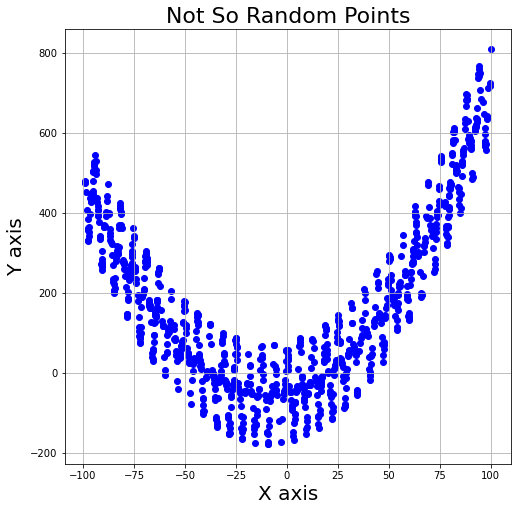

In [7]:
x = np.load("X.npy")
y = np.load("y.npy")

plt.figure(figsize=(8,8))
plt.title("Not So Random Points", fontsize=22)
plt.scatter(x,y,color="blue", marker="o")
plt.xlabel("X axis", fontsize=20)
plt.ylabel("Y axis", fontsize=20)
plt.grid()
plt.show()

[-5590.64124118 -4125.62531932 -4553.07748319 -5242.30507949
 -4689.51458145 -5083.32366064 -4425.73546224 -5252.05763162
 -4630.2140137  -4793.10525627]


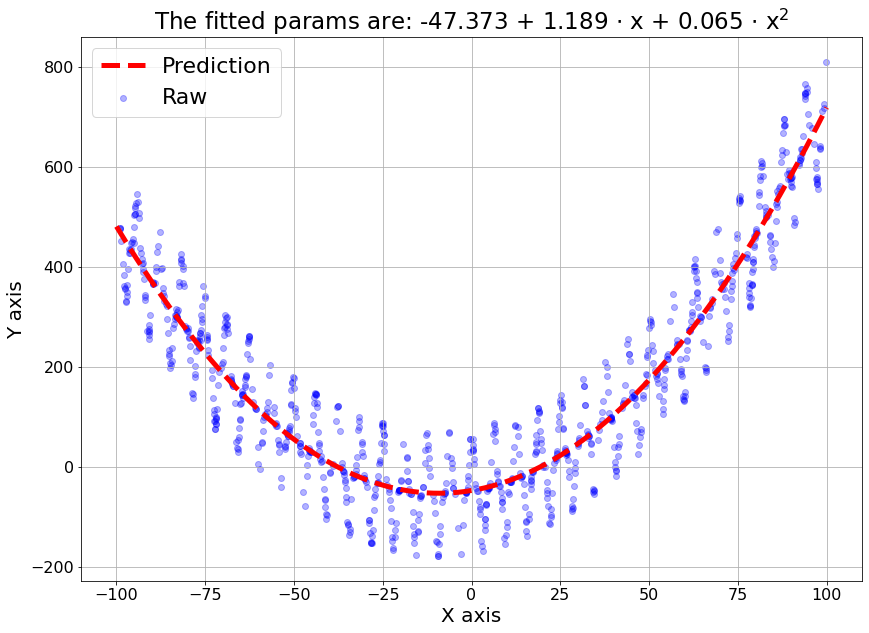

In [34]:
#i had to look around and then puff
#https://scikit-learn.org/0.23/auto_examples/model_selection/plot_underfitting_overfitting.html

deg = 2
polyreg = Pipeline([("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
                         ("linear_regression", LinearRegression())])

polyreg.fit(x[:, np.newaxis],y)
w1,w2 = polyreg[1].coef_
w0 = polyreg[1].intercept_

scores = cross_val_score(polyreg, x[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
print(scores)

x_test = np.linspace(-100,100,1000)

#now let's utilize these for a plot

fig,ax = plt.subplots(1,1,figsize=(14,10))

ax.set_title("The fitted params are: {0:.3f} + {1:.3f} $\cdot$ x + {2:.3f} $\cdot$ x$^2$".format(w0,w1,w2),fontsize=23)
ax.scatter(x,y,color="blue", marker="o",alpha=0.3, label="Raw")
ax.plot(x_test, polyreg.predict(x_test[:,np.newaxis]),color="red",linestyle="--",linewidth=5, label="Prediction")
ax.set_xlabel("X axis", fontsize=20)
ax.set_ylabel("Y axis", fontsize=20)
ax.legend(loc="best",fontsize=22)
ax.tick_params(axis="both",labelsize=16)
ax.grid()

plt.show()

`NOTE`: After looking at the data, it was very obvious thata high degree polynom could fit all points, but that would make any sense, as it will be overfitting. A second degree polynom is the right guess here!

### 2. Using different features

* plot the residuals (the difference between the prediction and the actual  y ) vs the original  y 
* a non-random-noise like pattern suggests non-linear connection between the features and the predictions
* someone told us that the connection between X and y is  y=A⋅X+B⋅cos^3(X)+C⋅X^2+D 
  * using sklearn's linear regression estimate  A,B,C,D !
* plot the residuals again! is it better now?



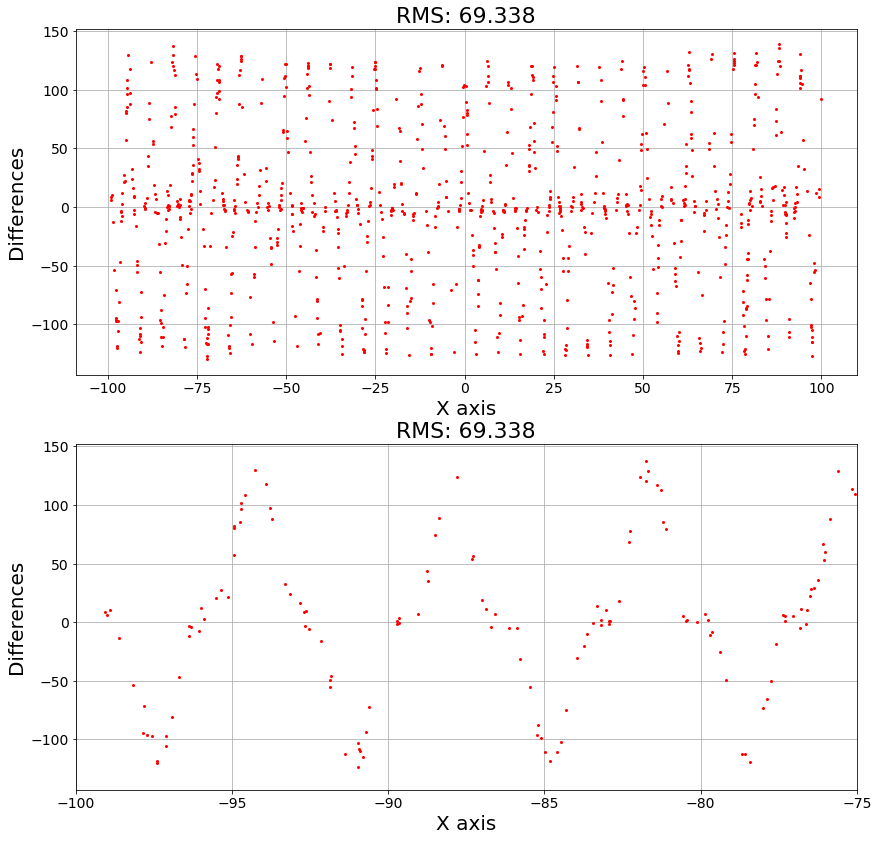

In [49]:
differences = y - polyreg.predict(x[:, np.newaxis])  #get differences
remainer = np.sqrt(np.mean(differences**2))          #some good measurement for catching the better fit

fig,ax = plt.subplots(2,1,figsize=(14,14))
ax[0].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[0].plot(x,differences," ro",markersize=2)
ax[0].set_xlabel("X axis",fontsize=20)
ax[0].set_ylabel("Differences",fontsize=20)
ax[0].tick_params(axis="both",labelsize=14)
ax[0].grid()

ax[1].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[1].plot(x,differences," ro",markersize=2)
ax[1].set_xlabel("X axis",fontsize=20)
ax[1].set_ylabel("Differences",fontsize=20)
ax[1].tick_params(axis="both",labelsize=14)
ax[1].set_xlim(-100,-75)
ax[1].grid()

plt.show()

`TRICK`: see a trend globally and locally too. IF something is visibly noticable, focus on it!

It is very visible that something is going on... something systematic... Wait a second!

In [52]:
def poly2(X):
    """
    Returns a transformed array
    A * X**2 + B * COS(X)**3 + C*X + D 
    """
    return np.hstack((np.cos(X)**3,X,X**2))

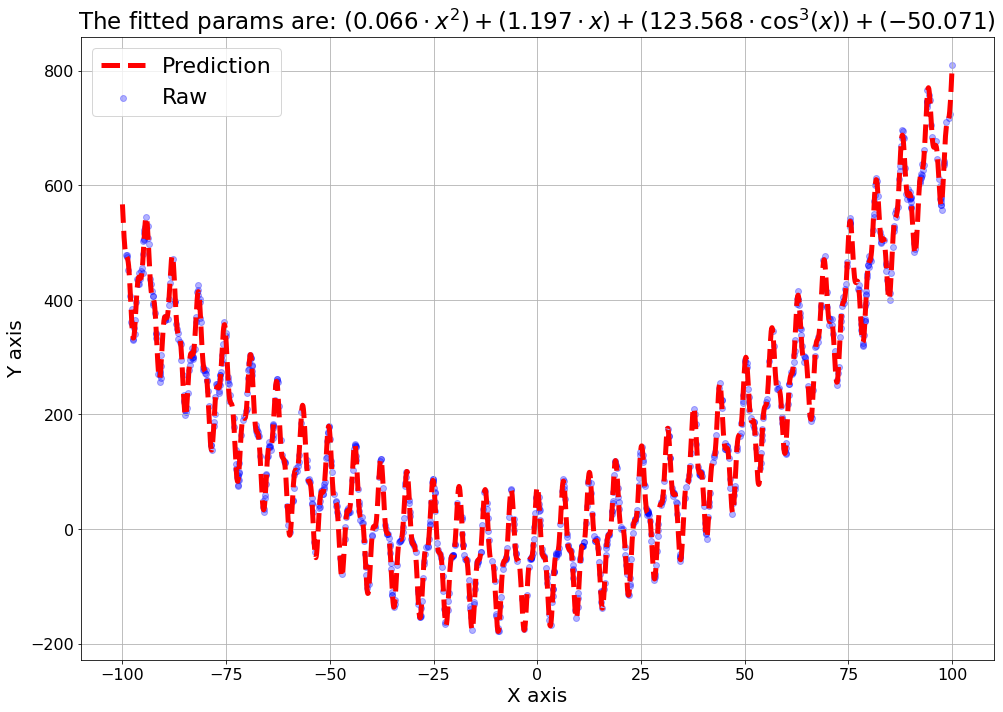

In [71]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html
polyreg2 = Pipeline([("custom polynom", FunctionTransformer(poly2)),
                         ("linear_regression", LinearRegression())])

polyreg2.fit(x[:,np.newaxis],y)
c,b,a = polyreg2[1].coef_
d = polyreg2[1].intercept_

x_test = np.linspace(-100,100,2000)

#now let's utilize these for a plot

fig,ax = plt.subplots(1,1,figsize=(14,10))

ax.set_title("The fitted params are: $({0:.3f}\cdot x^2) + ({1:.3f}\cdot x) + ({2:.3f}\cdot \cos^3(x)) + ({3:.3f})$".format(a,b,c,d),fontsize=23)
ax.scatter(x,y,color="blue", marker="o",alpha=0.3, label="Raw")
ax.plot(x_test, polyreg2.predict(x_test[:,np.newaxis]),color="red",linestyle="--",linewidth=5, label="Prediction")
ax.set_xlabel("X axis", fontsize=20)
ax.set_ylabel("Y axis", fontsize=20)
ax.legend(loc="best",fontsize=22)
ax.tick_params(axis="both",labelsize=16)
ax.grid()

fig.tight_layout()

plt.show()

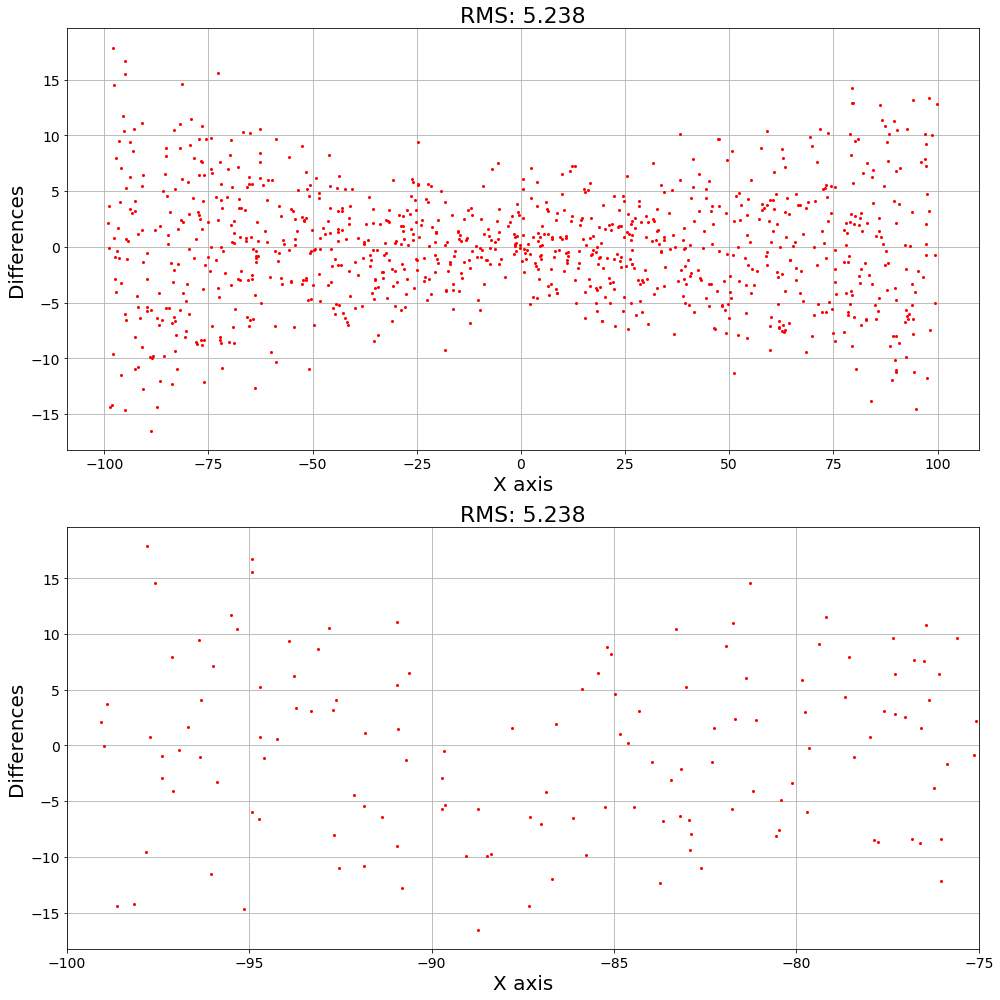

In [72]:
differences = y - polyreg2.predict(x[:, np.newaxis])  #get differences
remainer = np.sqrt(np.mean(differences**2))          #some good measurement for catching the better fit

fig,ax = plt.subplots(2,1,figsize=(14,14))
ax[0].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[0].plot(x,differences," ro",markersize=2)
ax[0].set_xlabel("X axis",fontsize=20)
ax[0].set_ylabel("Differences",fontsize=20)
ax[0].tick_params(axis="both",labelsize=14)
ax[0].grid()

ax[1].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[1].plot(x,differences," ro",markersize=2)
ax[1].set_xlabel("X axis",fontsize=20)
ax[1].set_ylabel("Differences",fontsize=20)
ax[1].tick_params(axis="both",labelsize=14)
ax[1].set_xlim(-100,-75)
ax[1].grid()

fig.tight_layout()
plt.show()

Now its much closer to a noise like thing, rather then a systematic error...

:o

### 3. Other methdods than sklearn for linear regression

* using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
* is the result the same? if not guess, why? (did you not forget to add the constant term?)
* try to get the same results with statsmodels as with sklearn!
* using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?



In [63]:
#https://www.statsmodels.org/stable/index.html

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [76]:
def poly1(x,a,b,c):
    return a*x**2 + b*x + c
def poly2v2(x,a,b,c,d):
    return a*x**2 + b*x + c*np.cos(x)**3 + d

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     4299.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:15:10   Log-Likelihood:                -5657.9
No. Observations:                1000   AIC:                         1.132e+04
Df Residuals:                     997   BIC:                         1.134e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.3729      3.331    -14.221      0.000     -53.910     -40.836
x1             1.1889      0.038     31.600      0.000       1.115       1.263
x2             0.0647      0.001     88.132      0.000       0.063       0.066
==============================================================================
Omnibus:                       44.152   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.905
Skew:                           0.031   Prob(JB):                     7.85e-05
Kurtosis:                       2.329   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

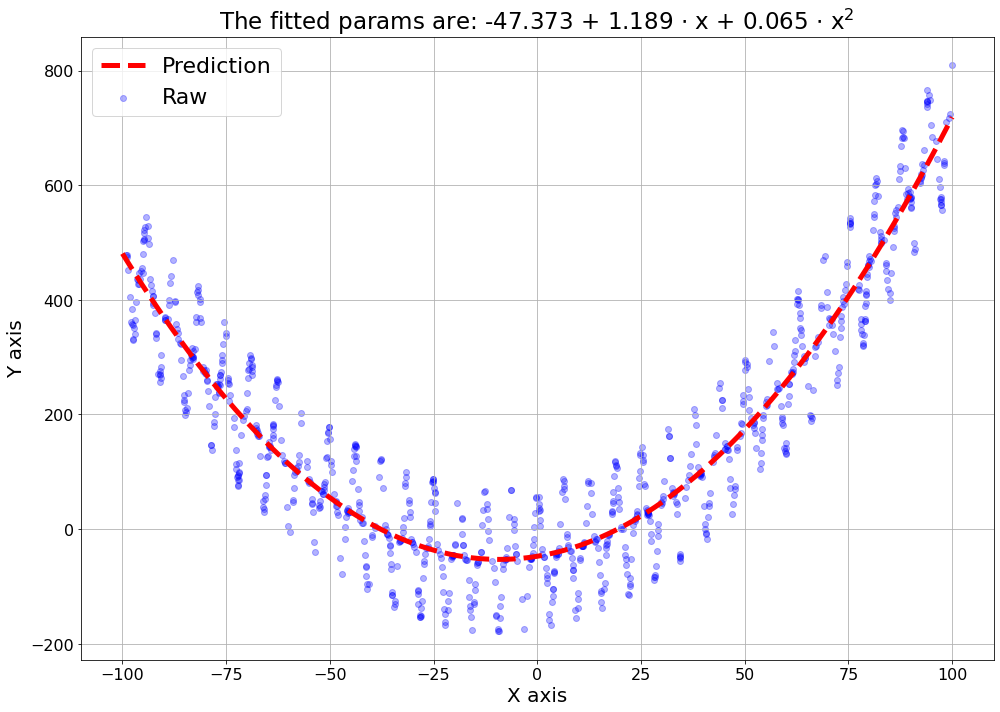

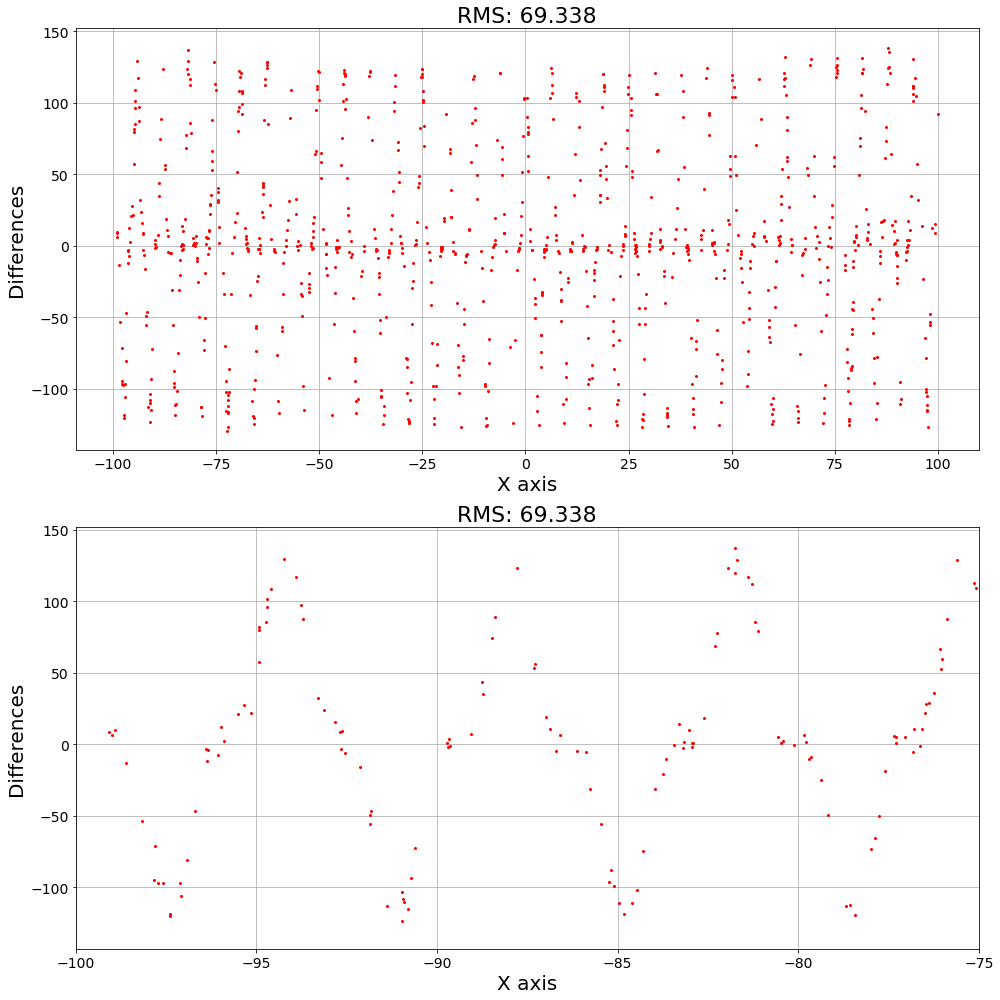

In [73]:
#this is some interesting stuff... seems easier then sklearn

X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(x[:,np.newaxis])
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
display(results.summary())
c,b,a = results.params

#plot the results
fig,ax = plt.subplots(1,1,figsize=(14,10))

ax.set_title("The fitted params are: {0:.3f} + {1:.3f} $\cdot$ x + {2:.3f} $\cdot$ x$^2$".format(c,b,a),fontsize=23)
ax.scatter(x,y,color="blue", marker="o",alpha=0.3, label="Raw")
ax.plot(x_test, poly1(x_test,a,b,c),color="red",linestyle="--",linewidth=5, label="Prediction")
ax.set_xlabel("X axis", fontsize=20)
ax.set_ylabel("Y axis", fontsize=20)
ax.legend(loc="best",fontsize=22)
ax.tick_params(axis="both",labelsize=16)
ax.grid()

fig.tight_layout()
plt.show()

differences = y - poly1(x,a,b,c)  #get differences
remainer = np.sqrt(np.mean(differences**2))          #some good measurement for catching the better fit

fig,ax = plt.subplots(2,1,figsize=(14,14))
ax[0].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[0].plot(x,differences," ro",markersize=2)
ax[0].set_xlabel("X axis",fontsize=20)
ax[0].set_ylabel("Differences",fontsize=20)
ax[0].tick_params(axis="both",labelsize=14)
ax[0].grid()

ax[1].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[1].plot(x,differences," ro",markersize=2)
ax[1].set_xlabel("X axis",fontsize=20)
ax[1].set_ylabel("Differences",fontsize=20)
ax[1].tick_params(axis="both",labelsize=14)
ax[1].set_xlim(-100,-75)
ax[1].grid()

fig.tight_layout()
plt.show()

So it seems it performs on the same level. Onto the next polynom!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.596e+05
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:23:22   Log-Likelihood:                -3074.8
No. Observations:                1000   AIC:                             6158.
Df Residuals:                     996   BIC:                             6177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0711      0.252   -198.817      0.000     -50.565     -49.577
x1           123.5677      0.297    416.608      0.000     122.986     124.150
x2             1.1968      0.003    420.898      0.000       1.191       1.202
x3             0.0657   5.55e-05   1183.097      0.000       0.066       0.066
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.135
Skew:                           0.082   Prob(JB):                        0.209
Kurtosis:                       3.220   Cond. No.                     8.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

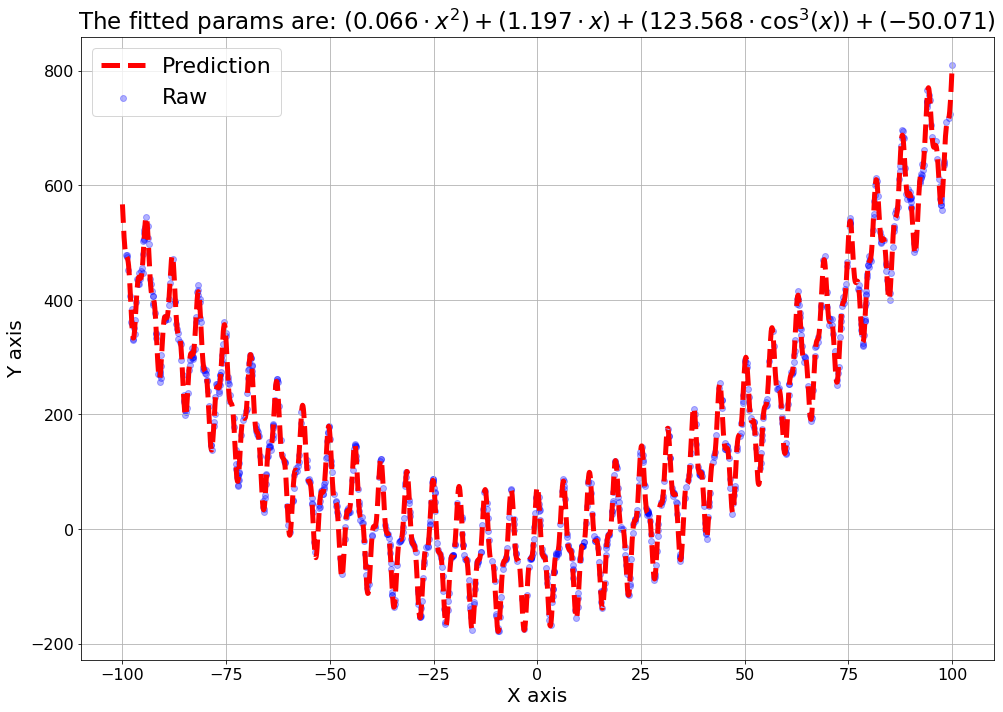

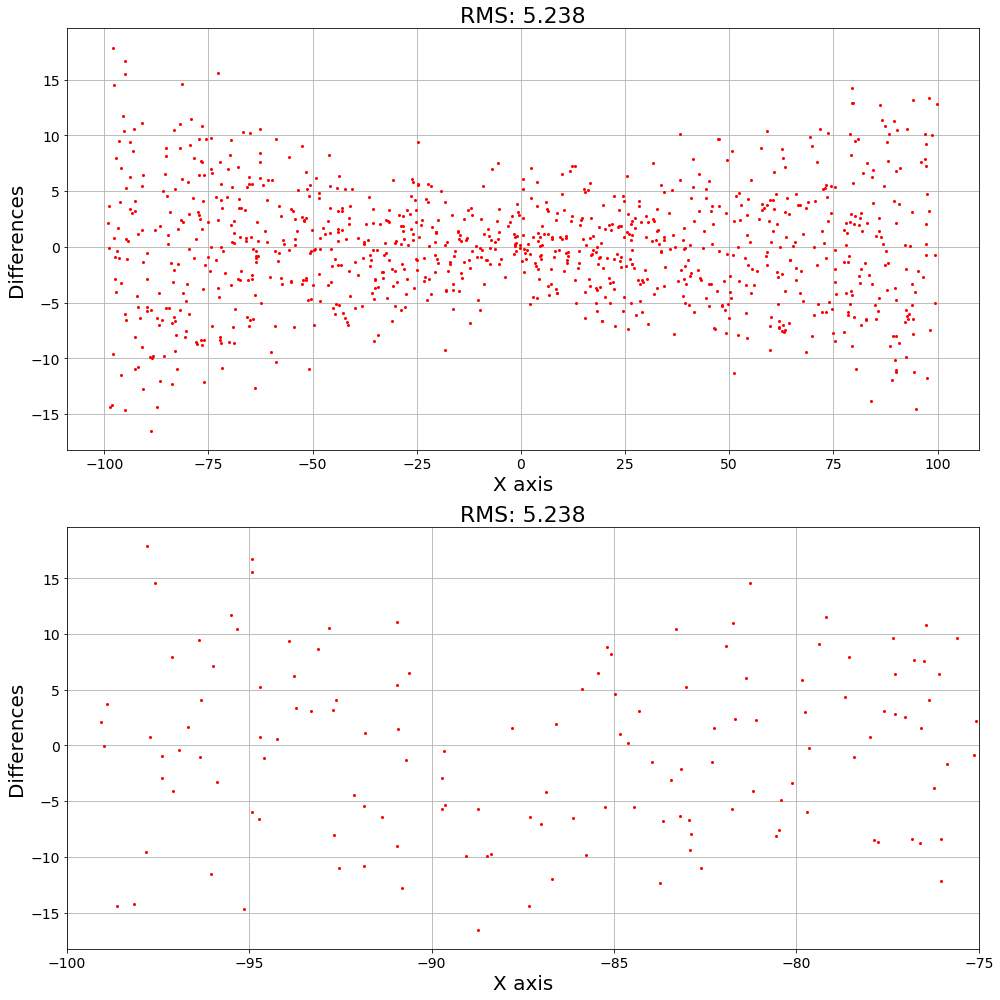

In [79]:
X = FunctionTransformer(poly2).fit_transform(x[:,np.newaxis])
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
display(results.summary())
d,c,b,a = results.params

fig,ax = plt.subplots(1,1,figsize=(14,10))

ax.set_title("The fitted params are: $({0:.3f}\cdot x^2) + ({1:.3f}\cdot x) + ({2:.3f}\cdot \cos^3(x)) + ({3:.3f})$".format(a,b,c,d),
             fontsize=23)
ax.scatter(x,y,color="blue", marker="o",alpha=0.3, label="Raw")
ax.plot(x_test, poly2v2(x_test,a,b,c,d),color="red",linestyle="--",linewidth=5, label="Prediction")
ax.set_xlabel("X axis", fontsize=20)
ax.set_ylabel("Y axis", fontsize=20)
ax.legend(loc="best",fontsize=22)
ax.tick_params(axis="both",labelsize=16)
ax.grid()

fig.tight_layout()
plt.show()

differences = y - poly2v2(x,a,b,c,d)  #get differences
remainer = np.sqrt(np.mean(differences**2))          #some good measurement for catching the better fit

fig,ax = plt.subplots(2,1,figsize=(14,14))
ax[0].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[0].plot(x,differences," ro",markersize=2)
ax[0].set_xlabel("X axis",fontsize=20)
ax[0].set_ylabel("Differences",fontsize=20)
ax[0].tick_params(axis="both",labelsize=14)
ax[0].grid()

ax[1].set_title("RMS: {0:.3f}".format(remainer),fontsize=22)
ax[1].plot(x,differences," ro",markersize=2)
ax[1].set_xlabel("X axis",fontsize=20)
ax[1].set_ylabel("Differences",fontsize=20)
ax[1].tick_params(axis="both",labelsize=14)
ax[1].set_xlim(-100,-75)
ax[1].grid()

fig.tight_layout()
plt.show()

Performs really well, almsot the same!

### 4.

* load the [real_estate](https://gist.github.com/qbeer/f356d7144543cbb09c9792c34b8ad722) data to a pandas dataframe
drop the ID column and the geographic location columns
fit a linear regression model to predict the unit price using sklearn



### 5.

* interpret the coefficients and their meaning shortly with your own words
* plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?

---



## Hints:

* On total you can get 10 points for fully completing all tasks.
* Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
* Comments you code when necessary
* Write functions for repetitive tasks!
* Use the pandas package for data loading and handling
* Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
* Use the scikit learn package for almost everything
* Use for loops only if it is really necessary!
* Code sharing is not allowed between student! Sharing code will result in zero points.
* If you use code found on web, it is OK, but, make its source clear!